In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\ozda2\\OneDrive\\שולחן העבודה\\שנה ג\\פרויקט גמר מדעי הנתונים\\career_change_prediction_dataset.csv")
data.head()

Field of Study Current Occupation  Age  Gender  Years of Experience  \
0       Medicine   Business Analyst   48    Male                    7   
1      Education          Economist   44    Male                   26   
2      Education          Biologist   21  Female                   27   
3      Education   Business Analyst   33    Male                   14   
4           Arts             Doctor   28  Female                    0   

  Education Level Industry Growth Rate  Job Satisfaction  Work-Life Balance  \
0     High School                 High                 7                 10   
1        Master's                  Low                10                  3   
2        Master's                  Low                 8                  3   
3             PhD               Medium                 7                  9   
4             PhD                  Low                 3                  1   

   Job Opportunities  ...  Skills Gap  Family Influence  Mentorship Available  \
0                 83  ...           8              High                     0   
1                 55  ...           3            Medium                     0   
2                 78  ...           4               Low                     0   
3                 62  ...           2            Medium                     1   
4                  8  ...           5               Low                     0   

   Certifications Freelancing Experience  Geographic Mobility  \
0               0                      0                    1   
1               0                      1                    1   
2               0                      0                    0   
3               0                      0                    0   
4               0                      1                    0   

   Professional Networks  Career Change Events  Technology Adoption  \
0                      2                     0                    1   
1                      2                     1                    9   
2                      2                     1                    2   
3                      9                     0                    1   
4                      2                     0                    7   

   Likely to Change Occupation  
0                            0  
1                            0  
2                            0  
3                            0  
4                            1  

[5 rows x 23 columns]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
features = ['Salary', 'Job Satisfaction', 'Work-Life Balance', 'Job Security', 'Years of Experience']
X = data[features]
y = data['Likely to Change Occupation']

In [5]:
# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Step 4: Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
print("🔹 Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

🔹 Logistic Regression Results
[[   0 3212]
 [   0 4477]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3212
           1       0.58      1.00      0.74      4477

    accuracy                           0.58      7689
   macro avg       0.29      0.50      0.37      7689
weighted avg       0.34      0.58      0.43      7689



In [13]:
# Step 5: Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
print("🔹 Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results
[[3153   59]
 [ 811 3666]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      3212
           1       0.98      0.82      0.89      4477

    accuracy                           0.89      7689
   macro avg       0.89      0.90      0.89      7689
weighted avg       0.91      0.89      0.89      7689



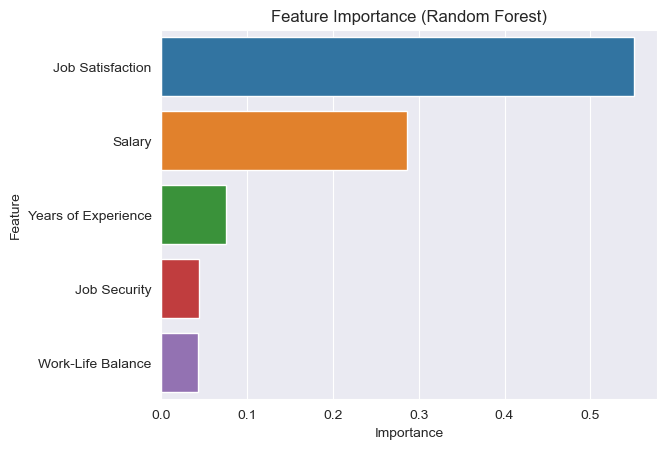

In [11]:
# Step 6: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance (Random Forest)')
plt.show()


על סמך ניתוח הנתונים באמצעות מודל Random Forest, נמצא כי קיימים מספר גורמים משמעותיים שמשפיעים על ההסתברות שעובד ישנה את עיסוקו:

 הגורמים העיקריים הם:
שביעות רצון מהעבודה  – ככל שהשביעות נמוכה יותר, הסיכוי לשנות עיסוק גבוה יותר.

איזון בין עבודה לחיים פרטיים  כאשר האיזון גרוע, אנשים שוקלים שינוי קריירה.

ביטחון תעסוקתי  תחושת חוסר ביטחון בעבודה מגבירה את הסיכוי לשינוי.

שנות ניסיון  עובדים בתחילת דרכם נוטים לשנות עיסוק יותר.

שכר – שכר נמוך משפיע, אך הוא לא הגורם המרכזי – אלא משלים לגורמים האחרים.

 Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Step 1: Features & Target
features = ['Salary', 'Job Satisfaction', 'Work-Life Balance', 'Job Security', 'Years of Experience']
X = data[features]
y = data['Likely to Change Occupation']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred_tree = tree_model.predict(X_test)

print("🔹 Decision Tree Results")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

🔹 Decision Tree Results
[[2525  687]
 [ 652 3825]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      3212
           1       0.85      0.85      0.85      4477

    accuracy                           0.83      7689
   macro avg       0.82      0.82      0.82      7689
weighted avg       0.83      0.83      0.83      7689



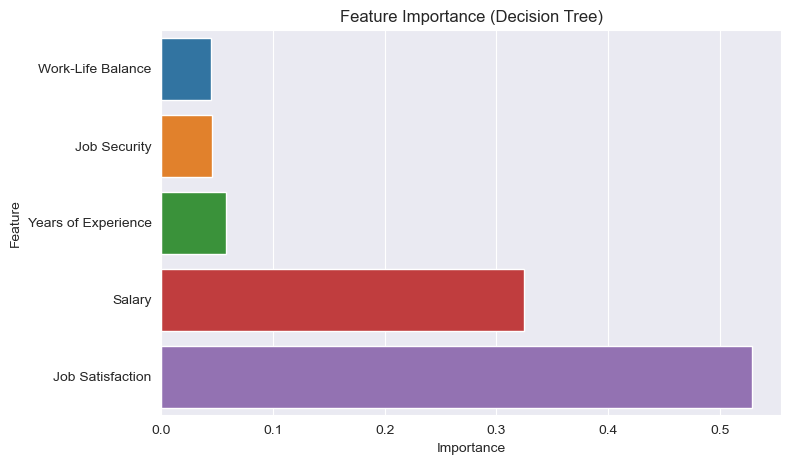

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# For Random Forest or Decision Tree
importances = tree_model.feature_importances_
features = X.columns

feature_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Feature Importance (Decision Tree)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


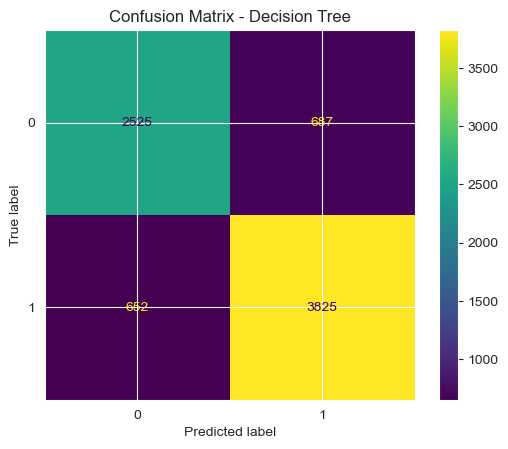

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(tree_model, X_test, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

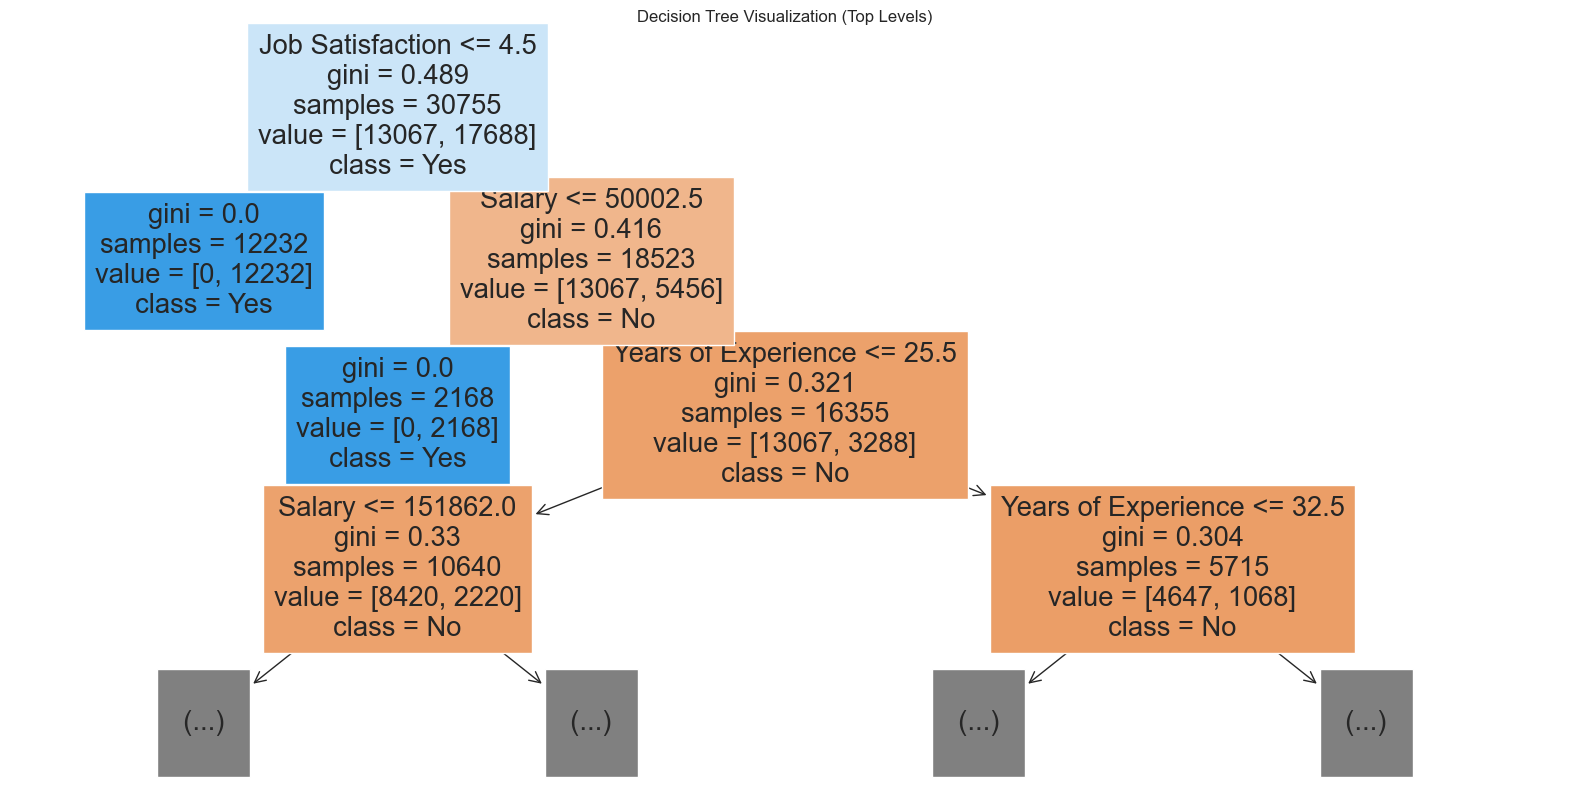

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=features, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("Decision Tree Visualization (Top Levels)")
plt.show()

עץ ההחלטה מצביע על כך ש־שביעות רצון מהעבודה הוא הגורם המשמעותי ביותר בהחלטה לשנות עיסוק, ומופיע בצומת הראשית. לאחריו, משתנים כמו ביטחון תעסוקתי, שכר ו־שנות ניסיון תורמים להחלטה.
מבנה העץ מאפשר להבין כיצד מתקבלות ההחלטות בצורה פשוטה ואינטואיטיבית, והוא מהווה כלי מעולה לפרשנות וחיזוי התנהגות העובדים.